# Вариант 9, Ягилев
## Безусловная минимизация функций нескольких переменных

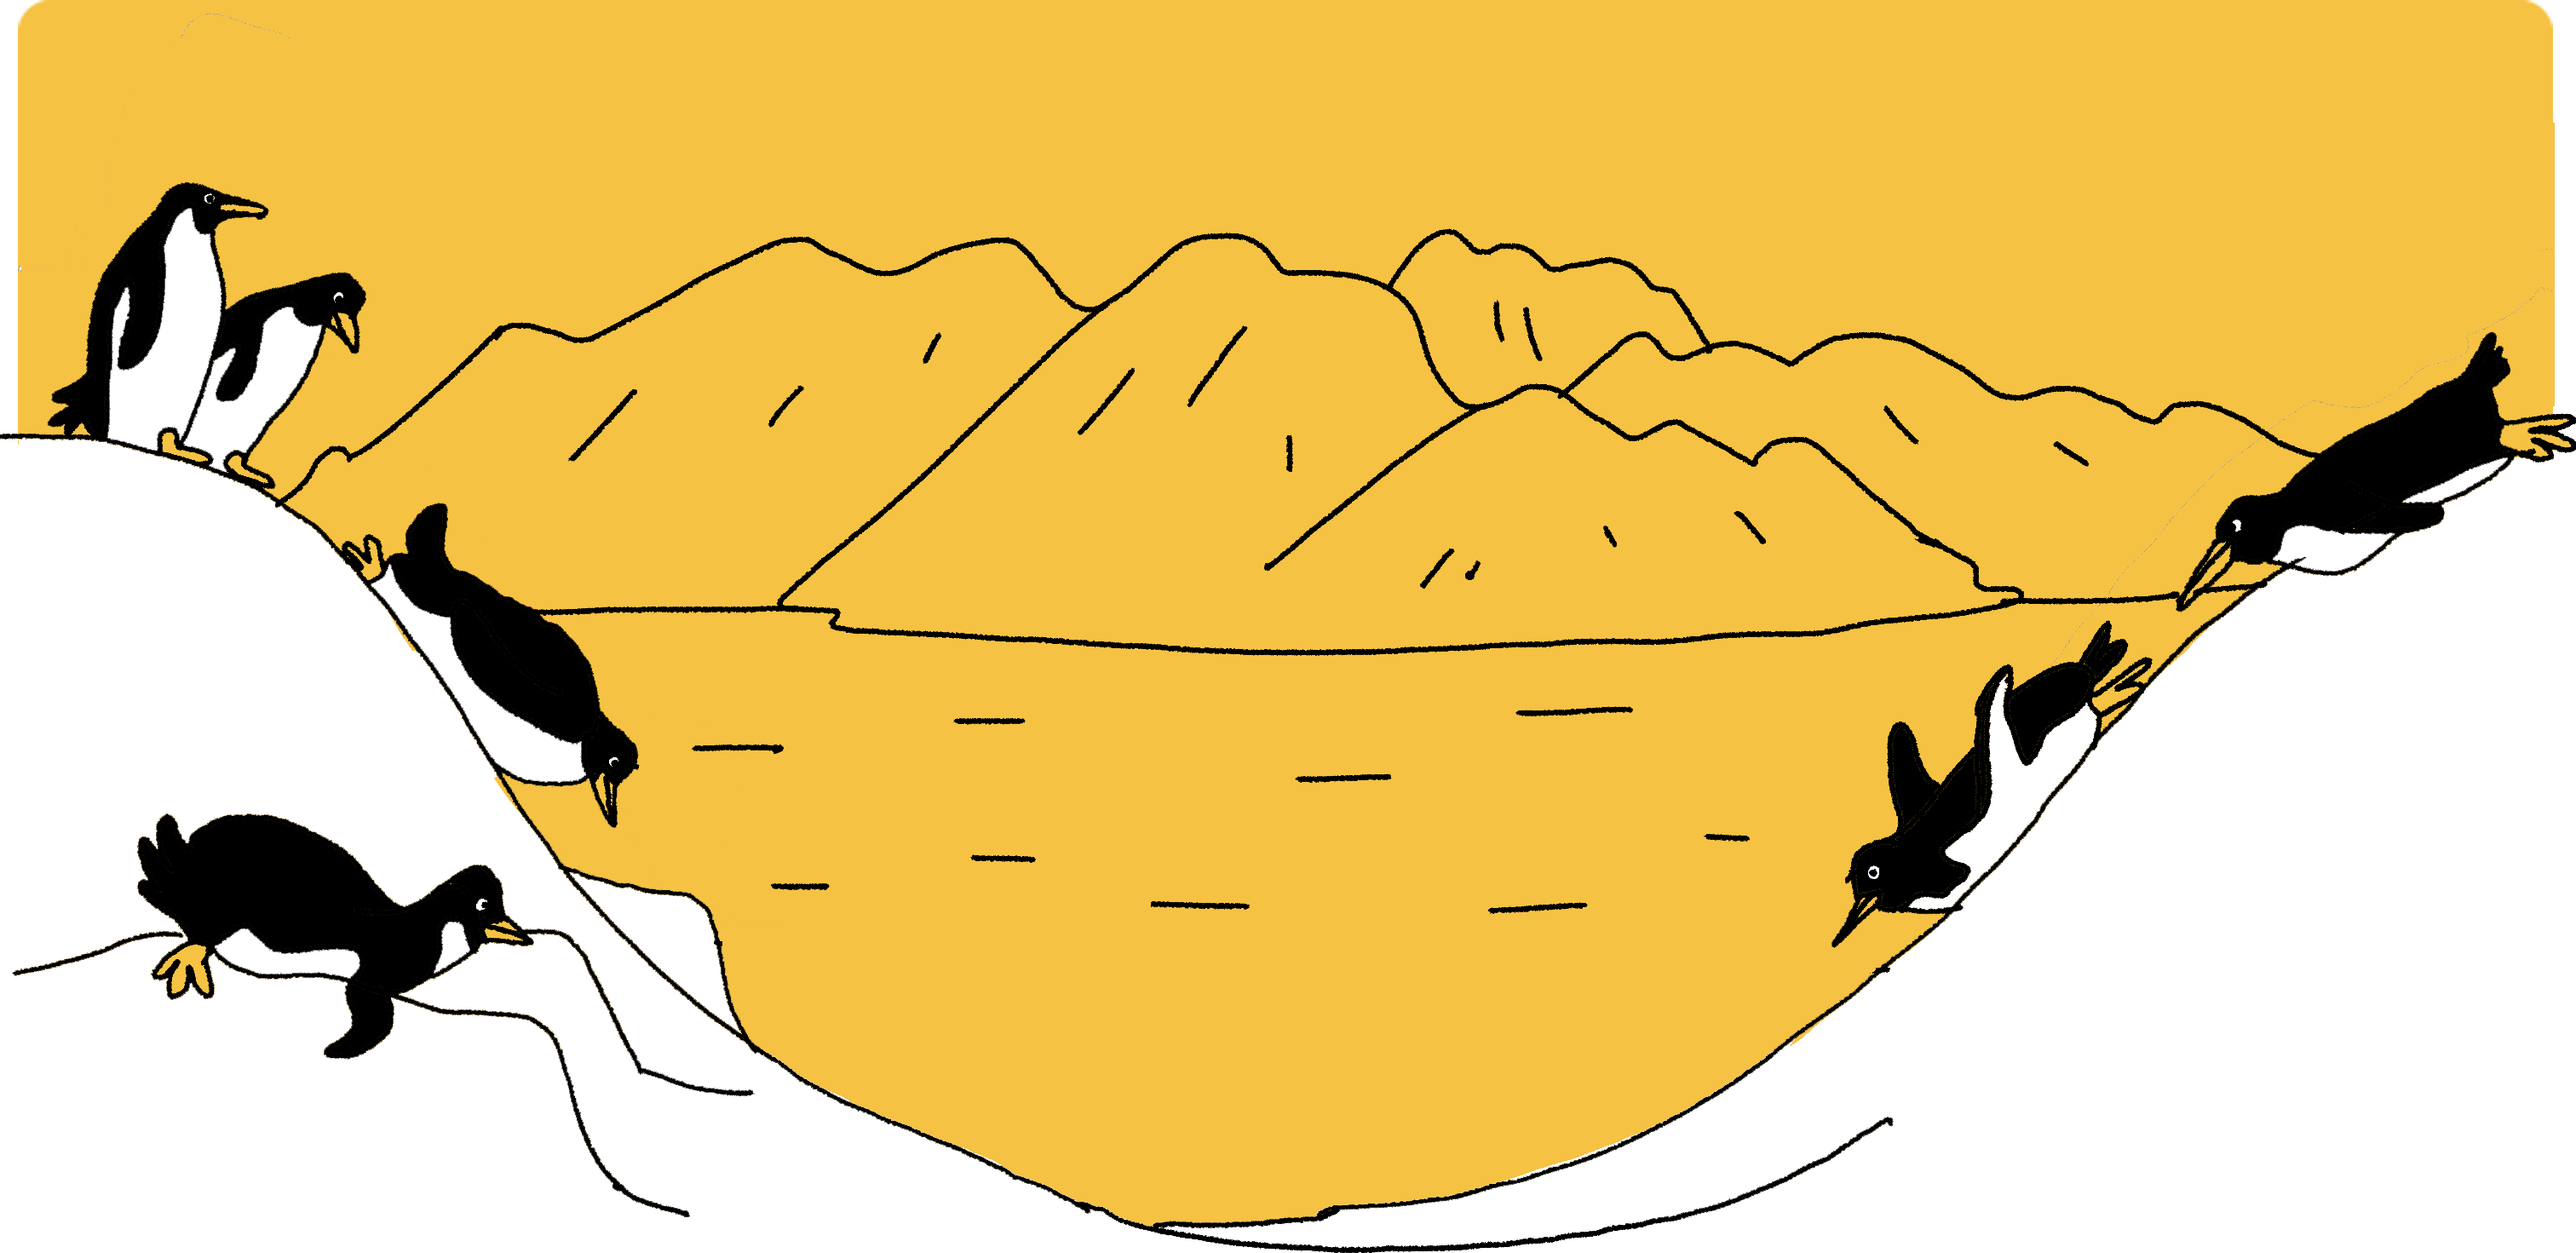

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Задание целевых функций

In [3]:
GAMMA = 10

def F1(x, y):
    return y - np.arctan(x)

def F2(x, y):
    return x - 1

# Только функция
def f1(x, y):
    return (GAMMA ** 2) * (F1(x, y) ** 2) + (F2(x, y) ** 2)

# Градиент для первой функции
def analytic_grad1(x, y):
    g1 = 2 * (F2(x, y) - (GAMMA**2) * F1(x, y) / (x**2 + 1))
    g2 =  2 * (GAMMA**2) * F1(x, y)
    return g1, g2

# Гессиан для первой функции
def analytic_hes1(x, y):
    h1 = 2 * (x**4 + 2 * x**2 + 2 * (GAMMA**2) * y * x + 101 - 2 * (GAMMA**2) * x * np.arctan(x)) / (x**2 + 1)**2
    h2 = - 2 * (GAMMA**2) / (x**2 + 1) # гессианы 21 и 12 равны в силу симметрии
    h3 = 2 * (GAMMA**2)
    return h1, h2, h3

def f2(x, y):
    return (GAMMA ** 2) * np.cosh(F1(x, y)) + np.cosh(F2(x, y))


def f3(x, y):
    return (GAMMA ** 2) * abs(F1(x, y)) + abs(F2(x, y))

In [4]:
# Численное нахождение градиента и гессиана
def get_grad(func, x, y, h):
    f = func(x, y)
    g1 = (func(x+h, y) - f) / h
    g2 = (func(x, y+h) - f) / h
    return g1, g2

def get_hes(func, x, y, h):
    f = func(x, y)
    f01 = func(x+2*h, y)
    f02 = func(x+h, y+h)
    f03 = func(x, y+2*h)
    f04 = func(x+h, y)
    f05 = func(x, y+h)
    hes1 = (f01 - 2 * f04 + f) / h**2
    hes2 = (f02 - f04 - f05 + f) / h**2
    hes3 = (f03 - 2 * f05 + f) / h**2
    return hes1, hes2, hes3

### Построение сеточного графика и линий уровня функции двух переменных

In [5]:
def makeData(f_xy):
    # Строим сетку в интервале от -3.5 до 3.5, имеющую 100 отсчетов по обоим координатам
    x = np.linspace(-3.5, 3.5, 200)
    y = np.linspace(-3.5, 3.5, 200)

    # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

    # В узлах рассчитываем значение функции
    z = f_xy(xgrid, ygrid)

    return xgrid, ygrid, z

def get_graph(f_xy, elev=None, azim=None, roll=None, slice=100):
    x, y, z = makeData(f_xy)

    # Сеточный график
    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.view_init(elev=elev, azim=azim, roll=roll)
    axes.set_xlabel('$X$')
    axes.set_ylabel('$Y$')
    axes.set_zlabel('$Z$')
    axes.plot_surface(x, y, z, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(projection='3d')
    ax2.view_init(elev=elev, azim=azim, roll=roll)
    ax2.set_xlabel('$X$')
    ax2.set_ylabel('$Y$')
    ax2.set_zlabel('$Z$')
    z2 = (slice * x / x)
    z2 = [[z2[i][j] if z2[i][j] < z[i][j] else z[i][j] for j in range(len(z2[i]))] for i in range(len(z2))]
    z2 = np.array(z2, dtype=float)
    ax2.plot_surface(x, y, z2, rstride=5, cstride=5, cmap='plasma')
    plt.show()
    # Линии уровня
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)
    plt.show()

#### Для первой фукнции

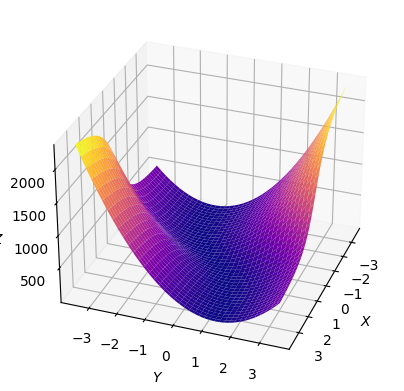

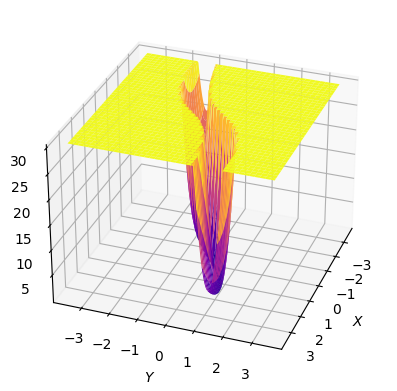

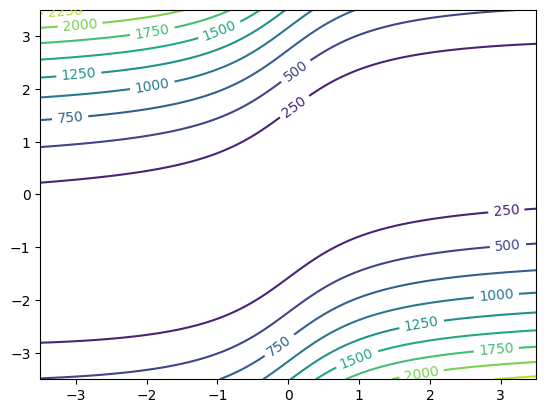

In [6]:
get_graph(f1, elev=None, azim=20, roll=None, slice=30)

#### Для второй фукнции

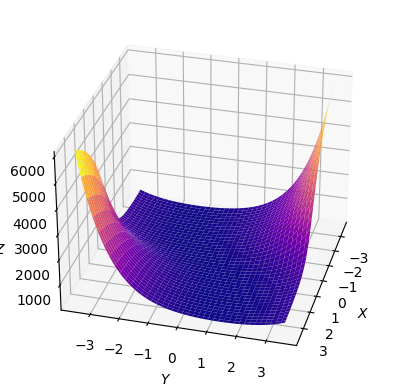

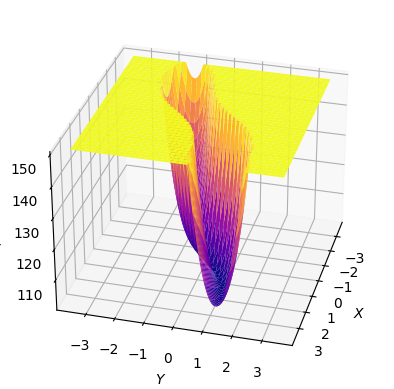

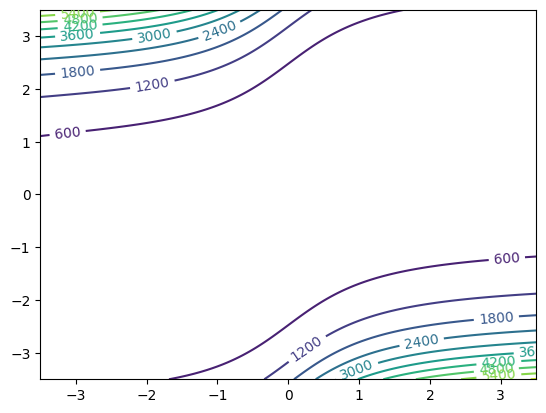

In [7]:
get_graph(f2, elev=None, azim=15, roll=None, slice=150)

#### Для третьей фукнции

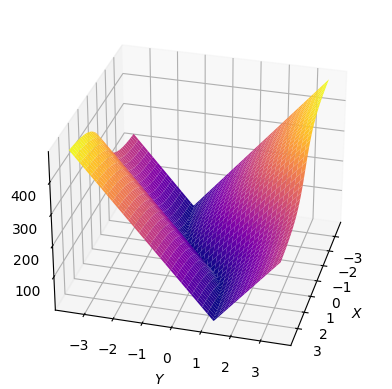

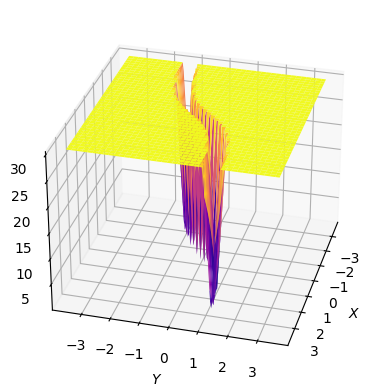

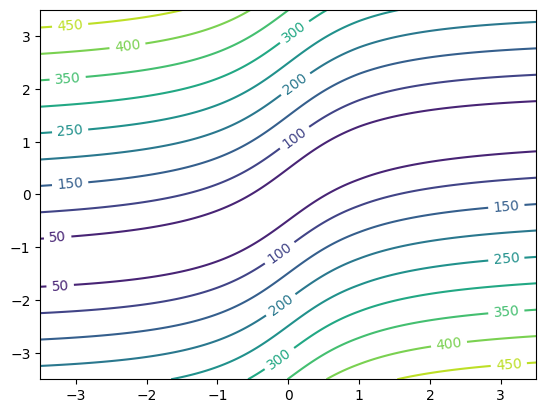

In [8]:
get_graph(f3, elev=None, azim=15, roll=None, slice=30)

## Проверка правильности программирования производных функции

In [9]:
# исследование погрешности градиента
def get_error(func, x, y, h):
    an_grad1, an_grad2 = analytic_grad1(x, y)
    g1, g2 = get_grad(func, x, y, h) 
    msg = f"Шаг = {h}\n"
    msg += f"Точное значение производной по x = {an_grad1}\n"
    msg += f"Приближённое значение производной по x = {g1}\n"
    msg += f"Абсолютная погрешность = {abs(an_grad1-g1)}\n"
    msg += f"Относительная погрешность = {abs((an_grad1-g1) / g1)}\n"
    msg += f"Точное значение производной по y = {an_grad2}\n"
    msg += f"Приближённое значение производной по y = {g2}\n"
    msg += f"Абсолютная погрешность = {abs(an_grad2-g2)}\n"
    msg += f"Относительная погрешность = {abs((an_grad2-g2) / g2)}\n\n"

    an_h1, an_h2, an_h3 = analytic_hes1(x, y)
    h1, h2, h3 = get_hes(func, x, y, h)
    msg += f"Точная вторая производная по x = {an_h1}\n"
    msg += f"Численная вторая производная по x = {h1}\n"
    msg += f"Абсолютная погрешность = {abs(an_h1-h1)}\n"
    msg += f"Относительная погрешность = {abs((an_h1-h1) / h1)}\n"
    msg += f"Точная вторая производная по xy = {an_h2}\n"
    msg += f"Численная вторая производная по xy = {h2}\n"
    msg += f"Абсолютная погрешность = {abs(an_h2-h2)}\n"
    msg += f"Относительная погрешность = {abs((an_h2-h2) / h2)}\n"
    msg += f"Точная вторая производная по y = {an_h3}\n"
    msg += f"Численная вторая производная по y = {h3}\n"
    msg += f"Абсолютная погрешность = {abs(an_h3-h3)}\n"
    msg += f"Относительная погрешность = {abs((an_h3-h3) / h3)}\n"
    msg += "--------------------------------------------------"
    print(msg)

x0, y0 = 3, 1
get_error(f1, x0, y0, 0.1)
get_error(f1, x0, y0, 0.00001)
get_error(f1, x0, y0, 0.00000001)

Шаг = 0.1
Точное значение производной по x = 8.980915447965089
Приближённое значение производной по x = 9.029941975988827
Абсолютная погрешность = 0.04902652802373808
Относительная погрешность = 0.005429329241993209
Точное значение производной по y = -49.809154479650886
Приближённое значение производной по y = -39.8091544796509
Абсолютная погрешность = 9.999999999999986
Относительная погрешность = 0.25119850272408195

Точная вторая производная по x = 1.011450731220948
Численная вторая производная по x = 0.9286885127048448
Абсолютная погрешность = 0.08276221851610321
Относительная погрешность = 0.08911730616227258
Точная вторая производная по xy = -20.0
Численная вторая производная по xy = -19.416865668217827
Абсолютная погрешность = 0.5831343317821727
Относительная погрешность = 0.030032361646126354
Точная вторая производная по y = 200
Численная вторая производная по y = 200.0000000000003
Абсолютная погрешность = 3.126388037344441e-13
Относительная погрешность = 1.563194018672218e-15
-

#### Вывод:
Оценив абсолютную и локальную погрешности, можно сделать вывод о правильной работе методов численного нахождения градиента и гессиана.
Также метод вычисления производных с помощью формул численного дифференцирования не всегда является эффективным для функций двух переменных. Иногда, чтобы получить маленькую погрешность нужно существенно уменьшить шаг. При этом неограниченное уменьшение шага ведет к увеличению погрешности за счет вычислительной погрешности. Тем не менее, в некоторых случаях при оптимальном выборе шага можно получить достаточно малую погрешность.

## Одношаговые градиентные методы

### Метод с фиксированным шагом и его коррекцией

In [10]:
# Построение графика траектории поиска
def graph_of_searchline(func, x_lst):
    x, y, z = makeData(func)
    cs = plt.contour(x, y, z, levels=10)
    plt.clabel(cs)

    xlist = [el[0] for el in x_lst]
    ylist = [el[1] for el in x_lst]
    plt.scatter(xlist, ylist, s=5)

def gradient_descent_const(func, xb, alpha, maxiter, tolg):
    x_lst = list() # список для траектории поиска

    exitflag = -1
    iters = 0
    xk = xb
    for i in range(maxiter):
        f = func(xk[0], xk[1])
        g = get_grad(func, xk[0], xk[1], 0.00001)
        x_lst.append(xk)
        ng = np.linalg.norm(g)
        if ng < tolg:
            exitflag = 1
            iters = i + 1
            break
        dx = [alpha * el for el in g]
        while_count = 0
        while True:
            ft = func(xk[0]-dx[0], xk[1]-dx[1])
            if ft <= f or while_count == 1500:
                break
            dx = [0.5 * el for el in dx]
            while_count += 1
        xk = [xk[i] - dx[i] for i in range(len(xk))]
    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    msg += f"Решение было найдено за количество итераций = {iters}\n" if exitflag == 1 else f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции 

Начальная точка = [2, 2]
Решение найдено в точке = [1.005204469481183, 0.7880110392358993], значение функции = 2.7116781977233528e-05
Решение было найдено за количество итераций = 3164

Начальная точка = [-2, -2]
Решение найдено в точке = [0.9940259308617019, 0.7823746003641986], значение функции = 3.576561361552676e-05
Решение было найдено за количество итераций = 4454



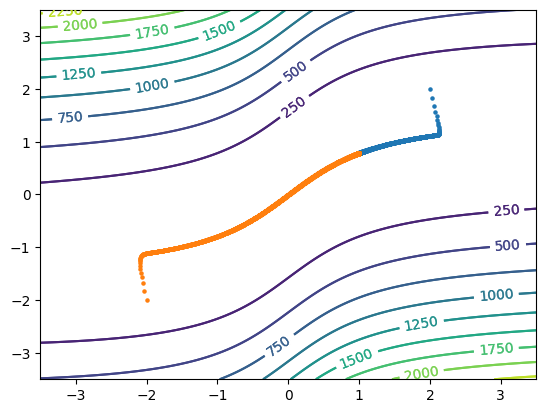

In [11]:
gradient_descent_const(f1, xb=[2, 2], alpha=0.001, maxiter=15000, tolg=0.01)
gradient_descent_const(f1, xb=[-2, -2], alpha=0.001, maxiter=15000, tolg=0.01)

#### Результат работы метода для второй функции 

Начальная точка = [2, 2]
Решение найдено в точке = [1.0107793246380652, 0.7907984947639761], значение функции = 101.0000581759424
Решение было найдено за количество итераций = 5354

Начальная точка = [-2, -2]
Решение найдено в точке = [0.9884100193655172, 0.7795190439036332], значение функции = 101.00006729167376
Решение было найдено за количество итераций = 7289



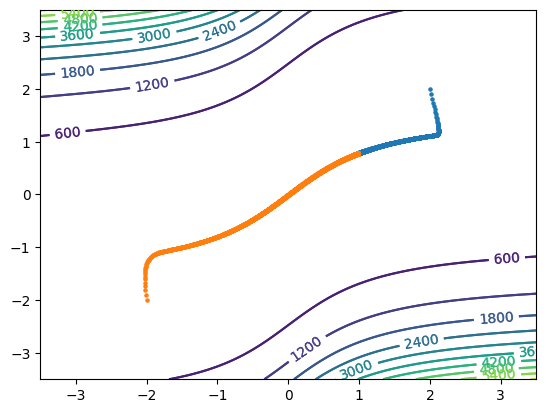

In [12]:
gradient_descent_const(f2, xb=[2, 2], alpha=0.001, maxiter=15000, tolg=0.01)
gradient_descent_const(f2, xb=[-2, -2], alpha=0.001, maxiter=15000, tolg=0.01)

#### Результат работы метода для третьей функции 

Начальная точка = [2, 2]
Решение найдено в точке = [2.153770690285114, 1.1361083984304194], значение функции = 1.154203742194424
Решение найдено по истечению максимального количества итераций = 15000

Начальная точка = [-2, -2]
Решение найдено в точке = [-2.1537707599234666, -1.136114501948354], значение функции = 3.153946824806584
Решение найдено по истечению максимального количества итераций = 15000



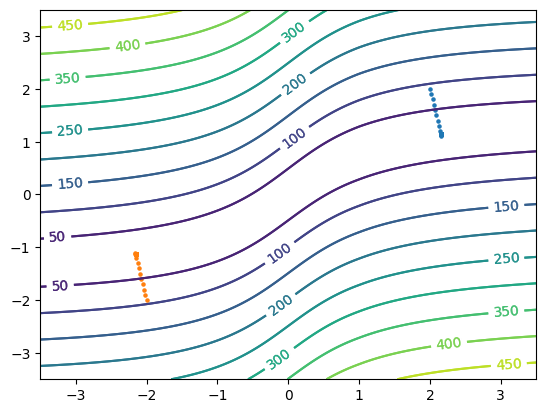

In [13]:
gradient_descent_const(f3, xb=[2, 2], alpha=0.001, maxiter=15000, tolg=0.01)
gradient_descent_const(f3, xb=[-2, -2], alpha=0.001, maxiter=15000, tolg=0.01)

### Метод наискорейшего спуска с использованием золотого сечения

In [14]:
def goldenratio(func, xb): # Метод золотого сечения
    x, y = xb[0], xb[1]
    eps = 0.01
    a = 0
    b = 2
    k1 = (3 - 5**0.5) / 2
    k2 = (5**0.5 - 1) / 2
    l1 = a + k1 * (b - a)
    l2 = a + k2 * (b - a)
    f1 = l1 * func(x,y)
    f2 = l2 * func(x,y)
    while (b - a) / 2 >= eps:
        if f1 < f2:
            b, l2, f2 = l2, l1, f1
            l1 = a + k1 * (b - a)
            f1 = l1 * func(x, y)
        else:
            a, l1, f1 = l1, l2, f2
            l2 = a + k2 * (b - a)
            f2 = l2 * func(x, y)
    return (a + b) / 2


def gradient_steepest_descent(func, xb, maxiter, tolg):
    x_lst = list()

    exitflag = -1
    iters = 0
    xk = xb
    for i in range(maxiter):
        g = get_grad(func, xk[0], xk[1], 0.00001)
        x_lst.append(xk)
        ng = np.linalg.norm(g)
        if ng < tolg:
            exitflag = 1
            iters = i + 1
            break
        if ng > 1:
            g = [el/ng for el in g]
        alpha = goldenratio(func, xk)
        dx = [alpha * el for el in g]
        xk = [xk[i] - dx[i] for i in range(len(xk))]

    xm = xk
    fv = func(xk[0], xk[1])
    graph_of_searchline(func, x_lst)
    msg = f"Начальная точка = {xb}\n"
    msg += f"Решение найдено в точке = {xm}, значение функции = {fv}\n"
    msg += f"Решение было найдено за количество итераций = {iters}\n" if exitflag == 1 else f"Решение найдено по истечению максимального количества итераций = {maxiter}\n"
    print(msg)

#### Результат работы метода для первой функции 

Начальная точка = [2, 2]
Решение найдено в точке = [1.005176887030662, 0.7879972097163566], значение функции = 2.6830058170584956e-05
Решение было найдено за количество итераций = 519

Начальная точка = [-2, -2]
Решение найдено в точке = [1.001865616393189, 0.7817796812344423], значение функции = 0.002074113442547735
Решение найдено по истечению максимального количества итераций = 3000



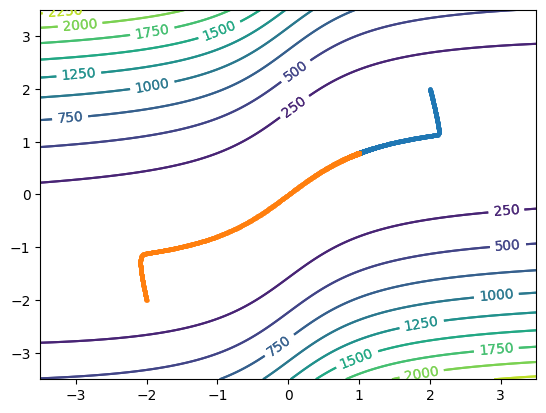

In [15]:
gradient_steepest_descent(f1, xb=[2, 2], maxiter=3000, tolg=0.01)
gradient_steepest_descent(f1, xb=[-2, -2], maxiter=3000, tolg=0.01)

#### Результат работы метода для второй функции 

Начальная точка = [2, 2]
Решение найдено в точке = [1.0107360590959666, 0.7907769227784779], значение функции = 101.00005770982138
Решение было найдено за количество итераций = 764

Начальная точка = [-2, -2]
Решение найдено в точке = [0.9884195061763306, 0.7795238824391219], значение функции = 101.00006718156348
Решение было найдено за количество итераций = 1151



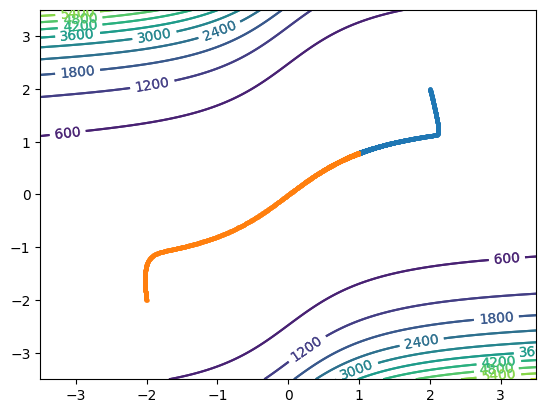

In [16]:
gradient_steepest_descent(f2, xb=[2, 2], maxiter=3000, tolg=0.01)
gradient_steepest_descent(f2, xb=[-2, -2], maxiter=3000, tolg=0.01)

#### Результат работы метода для третьей функции 

Начальная точка = [2, 2]
Решение найдено в точке = [1.0036416550172926, 0.786589292337841], значение функции = 0.0662803730124264
Решение найдено по истечению максимального количества итераций = 25000

Начальная точка = [-2, -2]
Решение найдено в точке = [-0.3296185821762785, -0.31648920820330867], значение функции = 1.5210538483528324
Решение найдено по истечению максимального количества итераций = 35000



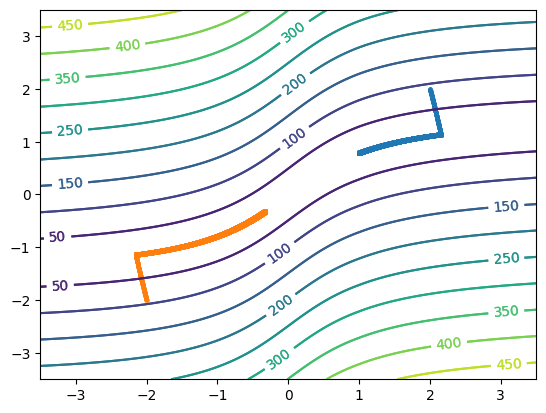

In [17]:
gradient_steepest_descent(f3, xb=[2, 2], maxiter=25000, tolg=0.01)
gradient_steepest_descent(f3, xb=[-2, -2], maxiter=35000, tolg=0.01)

#### Вывод:
Сравнив число итераций для каждого метода, можно убедиться в том, что метод с корректировкой шага обладает более низкой сходимостью относительно метода наискорейшего пуска. Также мы убедились на практике, что для третьей функции не применимы градиентные методы. Определение производных с помощью численных методов осуществляется с ошибками, которые ограничивают применение градиентных методов. Для корректного решения задачи можно воспользоваться методами Хука-Дживса, Нелдера-Мида.